# Features:

Name: The brand and model of the car.

Location: The location in which the car is being sold or is available for purchase.

Year: The year or edition of the model.

Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.

Fuel_Type: The type of fuel used by the car.

Transmission: The type of transmission used by the car.

Owner_Type: Whether the ownership is Firsthand, Second hand or other.

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in cc.

Power: The maximum power of the engine in bhp.

Seats: The number of seats in the car.

Price: The price of the used car in INR Lakhs.

# IMPORTING LIBS:

In [98]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [99]:
df_train = pd.read_excel(r"C:\Users\asus\Desktop\ONGC\Data_Train.xlsx")

# IMPORTING DATASET:

In [100]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


# CLEANING DATASET & MISSING VALUES:

#### Number of null row in columns

In [101]:
df_train.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

#### Percentage of data missing

In [102]:
(df_train.isnull().sum() / len(df_train)) * 100

Name                 0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.033228
Engine               0.598106
Power                0.598106
Seats                0.697790
Price                0.000000
dtype: float64

#### Renaming columns of dataset

In [103]:
df_train.insert(0, 'id', range(0, 0 + len(df_train)))
df_train.head()

,id,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [104]:
df_train.isna().sum()

id                    0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

### Seats Column

In [105]:
df_train.groupby('Seats')['id'].nunique()

Seats
0.0        1
2.0       16
4.0       99
5.0     5014
6.0       31
7.0      674
8.0      134
9.0        3
10.0       5
Name: id, dtype: int64

In [106]:
df_train['Seats'].mode()

0    5.0
dtype: float64

In [107]:
df_train["Seats"].fillna(value = 5.0, inplace=True)
df_train.Seats[df_train.Seats == 0.0] = 5.0
df_train.isna().sum()

id                    0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                 0
Price                 0
dtype: int64

### Mileage Column

In [108]:
df_train.groupby('Mileage')['id'].nunique()

Mileage
0.0 kmpl      68
10.0 kmpl     10
10.1 kmpl      7
10.13 kmpl     3
10.2 kmpl      6
              ..
9.52 kmpl      2
9.7 kmpl       1
9.74 kmpl      2
9.8 kmpl       4
9.9 kmpl       3
Name: id, Length: 442, dtype: int64


#### *Removing the string part and converting to the float, Taking mode and will replace emply rows with mode* 

In [109]:
df_train.Mileage[df_train.Mileage == '0.0 kmpl'] = np.nan
df_train['Mileage'] = df_train['Mileage'].apply(lambda x: re.sub(r'(\d+\.\d+)\s(kmpl|km\/kg)', r'\1', str(x)))
df_train['Mileage'] = df_train['Mileage'].astype(float)
df_train['Mileage'].mode()

0    17.0
dtype: float64

In [110]:
df_train['Mileage'].fillna(value = 17.0, inplace = True)
df_train.isna().sum()

id                    0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               36
Power                36
Seats                 0
Price                 0
dtype: int64

### Engine Column

In [111]:
df_train.groupby('Engine')['id'].nunique()

Engine
1047 CC      4
1061 CC     30
1086 CC    108
1120 CC     54
1150 CC      7
          ... 
970 CC       1
993 CC      14
995 CC      10
998 CC     259
999 CC      29
Name: id, Length: 146, dtype: int64

#### *Removing the string part and converting to the float, Taking mode and will replace emply rows with mode* 

In [112]:
df_train['Engine'] = df_train['Engine'].apply(lambda x: re.sub(r'(\d+)\s(CC)', r'\1', str(x)))
df_train['Engine'] = df_train['Engine'].astype(float)
df_train['Engine'].mode()

0    1197.0
dtype: float64

In [113]:
df_train['Engine'].fillna(value = 1197.0, inplace = True)
df_train.isna().sum()

id                    0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                36
Seats                 0
Price                 0
dtype: int64

### Power Column

In [114]:
df_train['Power'] = df_train['Power'].str.split(' ').str[0]
# including nan rows there is data in this column of 'null' value
df_train.Power[df_train.Power == 'null'] = np.NaN
df_train['Power'].isnull().sum()

143

In [115]:
df_train['Power'] = df_train['Power'].astype(float)
df_train['Power'].mode()

0    74.0
dtype: float64

In [116]:
df_train['Power'].fillna(value = 74, inplace = True)
df_train.isna().sum()

id                   0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

### Name Column

In [117]:
df_train['Name'] = df_train['Name'].str.split(' ').str[0]
df_train.groupby('Name')['id'].nunique()

Name
Ambassador          1
Audi              236
BMW               267
Bentley             1
Chevrolet         121
Datsun             13
Fiat               28
Force               3
Ford              300
Honda             608
Hyundai          1107
ISUZU               2
Isuzu               1
Jaguar             40
Jeep               15
Lamborghini         1
Land               60
Mahindra          272
Maruti           1211
Mercedes-Benz     318
Mini               26
Mitsubishi         27
Nissan             91
Porsche            18
Renault           145
Skoda             173
Smart               1
Tata              186
Toyota            411
Volkswagen        315
Volvo              21
Name: id, dtype: int64

In [118]:
df_train.Name[df_train.Name == 'Isuzu'] = 'ISUZU'

In [119]:
df_train.head()

,id,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


### Data is for Visualizing with cleaned dataset

In [120]:
dataset = df_train.copy()

In [121]:
del df_train['id']

In [122]:
df_train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

#### Converting datatypes from int to float

In [123]:
df_train['Year'] = df_train['Year'].astype(float)
df_train['Kilometers_Driven'] = df_train['Kilometers_Driven'].astype(float)

In [124]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010.0,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,2015.0,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,2011.0,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,2012.0,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [125]:
#### For improving the prediction values

df_train['Price_log'] = np.log1p(df_train['Price'].values)
del df_train['Price']



# VISUALIZING THE DATASET:

### Year wise count

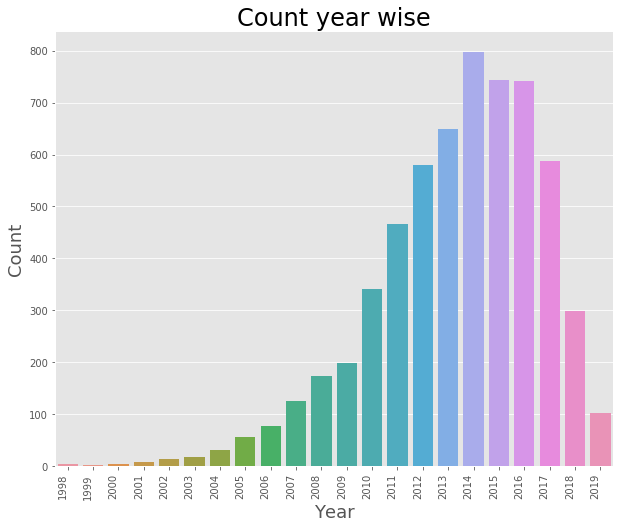

In [126]:
plt.figure(figsize = (10,8))
bar1 = sns.countplot(dataset['Year'])
bar1.set_xticklabels(bar1.get_xticklabels(), rotation = 90, ha = 'right')
plt.title('Count year wise', size = 24)
plt.xlabel('Year', size = 18)
plt.ylabel('Count', size = 18)
plt.show()


### Name Type wise count

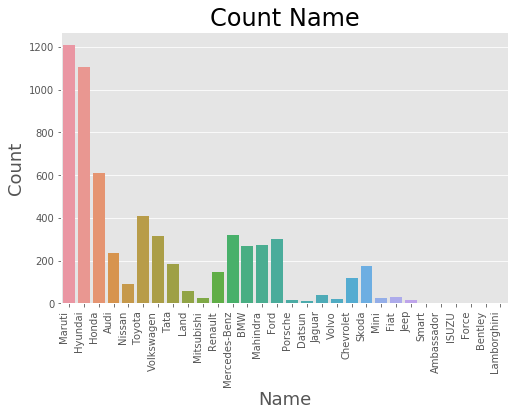

In [127]:
plt.figure(figsize = (8,5))
bar1 = sns.countplot(dataset['Name'])
bar1.set_xticklabels(bar1.get_xticklabels(), rotation = 90, ha = 'right')
plt.title('Count Name', size = 24)
plt.xlabel('Name', size = 18)
plt.ylabel('Count', size = 18)
plt.show()

### Seats Type wise count

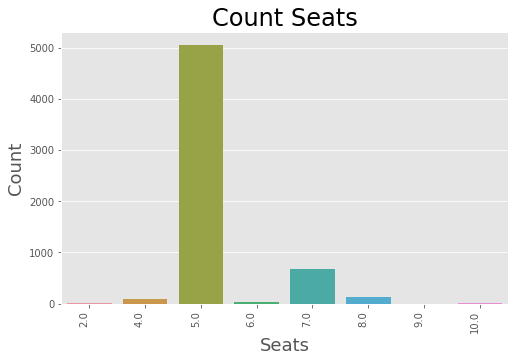

In [128]:
plt.figure(figsize = (8,5))
bar1 = sns.countplot(dataset['Seats'])
bar1.set_xticklabels(bar1.get_xticklabels(), rotation = 90, ha = 'right')
plt.title('Count Seats', size = 24)
plt.xlabel('Seats', size = 18)
plt.ylabel('Count', size = 18)
plt.show()

### Owner Type wise count

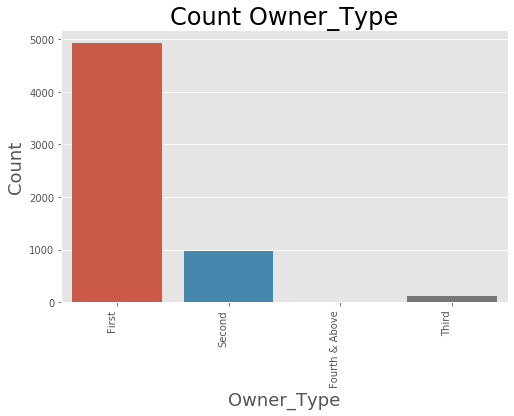

In [129]:
plt.figure(figsize = (8,5))
bar1 = sns.countplot(dataset['Owner_Type'])
bar1.set_xticklabels(bar1.get_xticklabels(), rotation = 90, ha = 'right')
plt.title('Count Owner_Type', size = 24)
plt.xlabel('Owner_Type', size = 18)
plt.ylabel('Count', size = 18)
plt.show()

### Mileage wise count

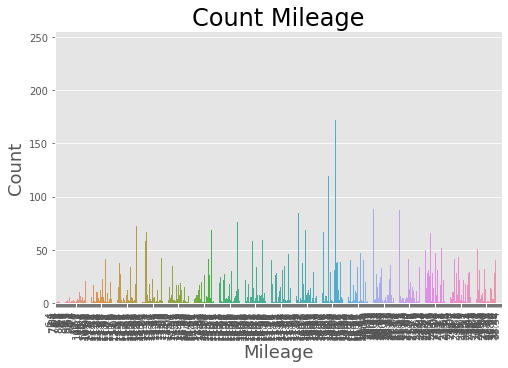

In [130]:
plt.figure(figsize = (8,5))
bar1 = sns.countplot(dataset['Mileage'])
bar1.set_xticklabels(bar1.get_xticklabels(), rotation = 90, ha = 'right')
plt.title('Count Mileage', size = 24)
plt.xlabel('Mileage', size = 18)
plt.ylabel('Count', size = 18)
plt.show()



### Fuel Types count

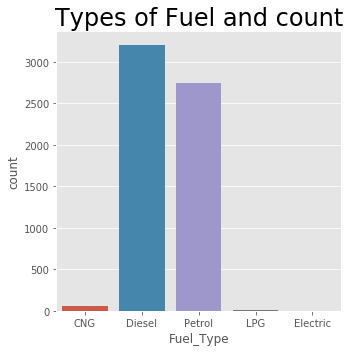

In [131]:
plt.figure(figsize = (5,5))
sns.countplot(dataset['Fuel_Type'])
plt.title('Types of Fuel and count', size = 24)
plt.tight_layout()
plt.show()

### Types of Transmission and count

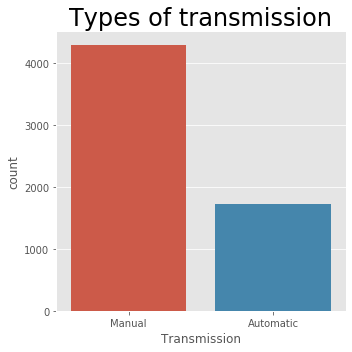

In [132]:
plt.figure(figsize = (5,5))
sns.countplot(dataset['Transmission'])
plt.title('Types of transmission', size = 24)
plt.tight_layout()
plt.show()

In [133]:
plt.style.use('ggplot')
colors = ['#FF8C73','#66b3ff','#99ff99','#CA8BCA', '#FFB973', '#89DF38', '#8BA4CA', '#ffcc99', 
          '#72A047', '#3052AF', '#FFC4C4']

### Loction graph and percentage

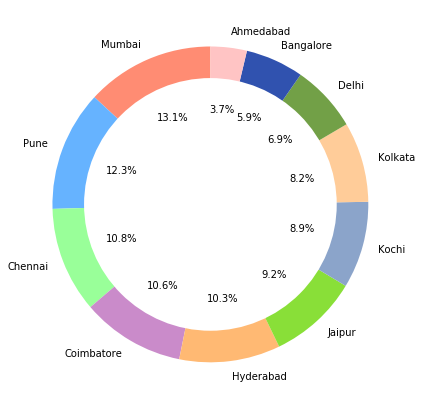

In [134]:
plt.figure(figsize = (6,6))
plt.pie(dataset['Location'].value_counts(), startangle = 90, autopct = '%1.1f%%', colors = colors, 
        labels = dataset['Location'].unique())
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

### Name graph and percentage

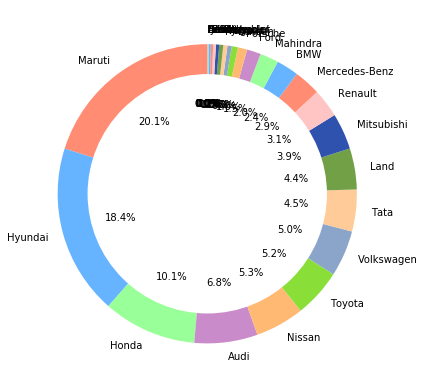

In [135]:
plt.figure(figsize = (6,6))
plt.pie(dataset['Name'].value_counts(), startangle = 90, autopct = '%1.1f%%', colors = colors, 
        labels = dataset['Name'].unique())
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

### Year graph and percentage

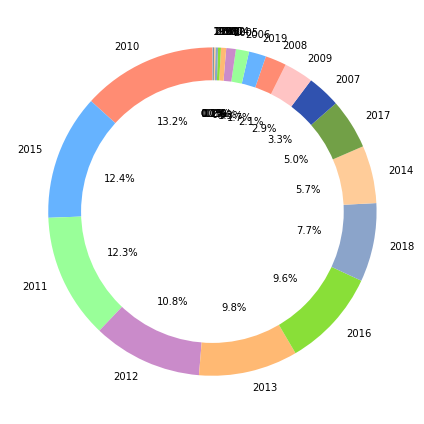

In [136]:
plt.figure(figsize = (6,6))
plt.pie(dataset['Year'].value_counts(), startangle = 90, autopct = '%1.1f%%', colors = colors, 
        labels = dataset['Year'].unique())
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

### Fuel_Type graph and percentage

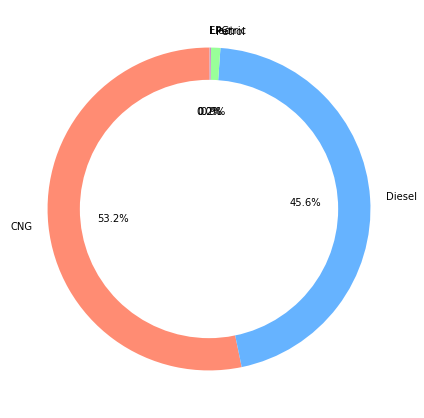

In [137]:
plt.figure(figsize = (6,6))
plt.pie(dataset['Fuel_Type'].value_counts(), startangle = 90, autopct = '%1.1f%%', colors = colors, 
        labels = dataset['Fuel_Type'].unique())
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

### Transmission graph and percentage

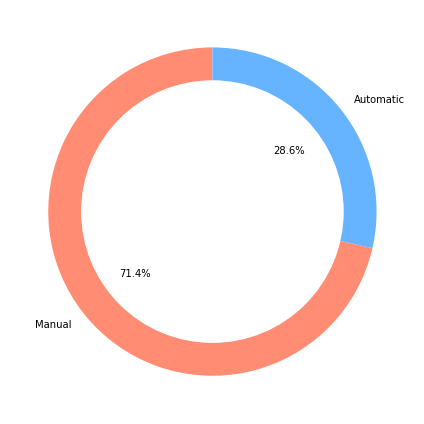

In [138]:
plt.figure(figsize = (6,6))
plt.pie(dataset['Transmission'].value_counts(), startangle = 90, autopct = '%1.1f%%', colors = colors, 
        labels = dataset['Transmission'].unique())
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

### Owner_Type graph and percentage

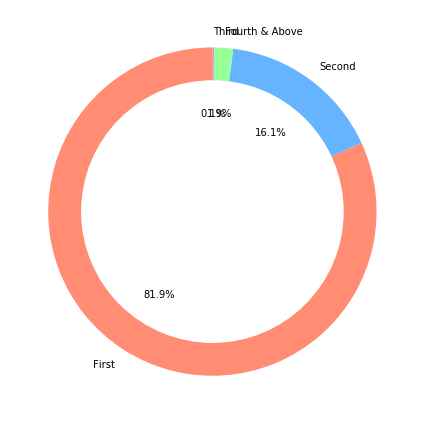

In [139]:
plt.figure(figsize = (6,6))
plt.pie(dataset['Owner_Type'].value_counts(), startangle = 90, autopct = '%1.1f%%', colors = colors, 
        labels = dataset['Owner_Type'].unique())
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

### Seats graph and percentage

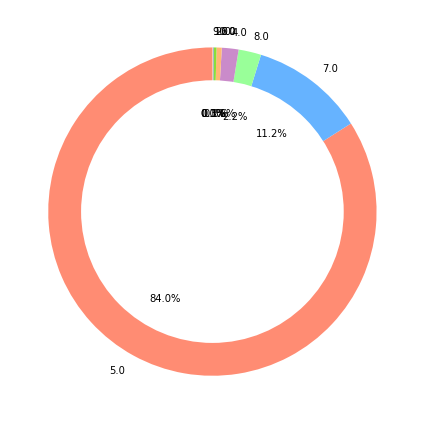

In [140]:
plt.figure(figsize = (6,6))
plt.pie(dataset['Seats'].value_counts(), startangle = 90, autopct = '%1.1f%%', colors = colors, 
        labels = dataset['Seats'].unique())
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

In [141]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price_log
0,Maruti,Mumbai,2010.0,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.011601
1,Hyundai,Pune,2015.0,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,2.602690
2,Honda,Chennai,2011.0,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,1.704748
3,Maruti,Chennai,2012.0,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,1.945910
4,Audi,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,2.930660


In [142]:
df_train.shape

(6019, 12)

In [143]:
from scipy import stats

## Checking for outliers And removing them by help of z score


Text(0.5, 1.0, 'Outliers for Engine')

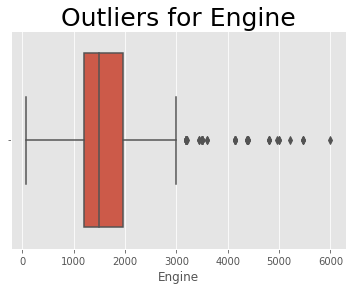

In [144]:
sns.boxplot(x=df_train['Engine'])
plt.title('Outliers for Engine',fontsize=25)

In [145]:
z=np.abs(stats.zscore(df_train.Engine))

In [146]:
threshold=3
print(np.where(z>3))

(array([  70,  152,  459,  586,  589,  693,  798,  926, 1038, 1093, 1352,
       1596, 1930, 2100, 2305, 2681, 2978, 3065, 3242, 3341, 3580, 4039,
       4136, 4342, 4388, 4451, 4559, 4627, 4691, 4722, 4821, 4869, 4938,
       5088, 5341, 5414, 5416, 5521, 5603, 5728, 5781, 5885, 5919, 6011],
      dtype=int64),)


In [147]:
df_train=df_train[(z<3)]
df_train.shape

(5975, 12)

Text(0.5, 1.0, 'After outliers removal')

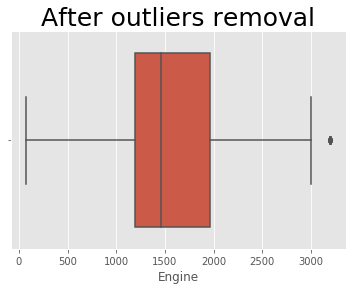

In [148]:
sns.boxplot(x=df_train['Engine'])
plt.title('After outliers removal',fontsize=25)

Text(0.5, 1.0, 'Outliers for Mileage')

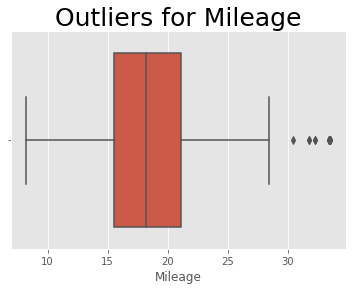

In [149]:
sns.boxplot(x=df_train['Mileage'])
plt.title('Outliers for Mileage',fontsize=25)

In [150]:
z=np.abs(stats.zscore(df_train.Mileage))

In [151]:
threshold=3
print(np.where(z>3))
df_train=df_train[(z<3)]

(array([1259, 1322, 2046, 2356, 2685, 3101, 3111, 3533, 3848, 4118, 4739,
       5144, 5892], dtype=int64),)


In [152]:
df_train.shape

(5962, 12)

Text(0.5, 1.0, 'After removing outliers')

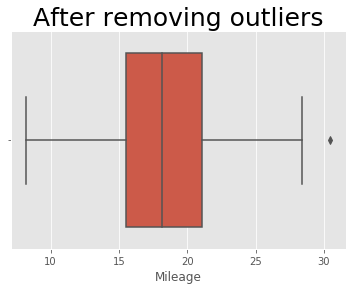

In [153]:
sns.boxplot(x=df_train['Mileage'])
plt.title('After removing outliers',fontsize=25)

Text(0.5, 1.0, 'Outliers for Power')

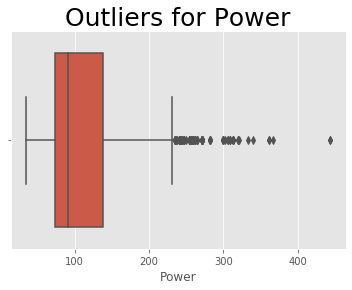

In [154]:
sns.boxplot(x=df_train['Power'])
plt.title('Outliers for Power',fontsize=25)

In [155]:
df_train.shape

(5962, 12)

In [156]:
from scipy import stats
z=np.abs(stats.zscore(df_train.Power))
threshold=3

In [157]:
df_train=df_train[(z<3)]


Text(0.5, 1.0, 'After removing outliers')

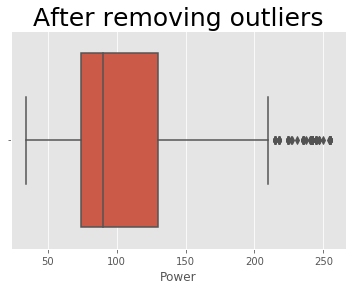

In [158]:
sns.boxplot(x=df_train['Power'])
plt.title('After removing outliers',fontsize=25)

In [159]:
df_train.shape

(5867, 12)

Text(0.5, 1.0, 'Outliers for year')

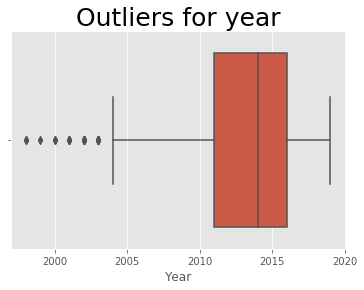

In [160]:
 sns.boxplot(x=df_train['Year'])
plt.title('Outliers for year',fontsize=25)

In [161]:
z=np.abs(stats.zscore(df_train.Year))
threshold=3
df_train=df_train[(z<3)]

Text(0.5, 1.0, 'After removing outliers')

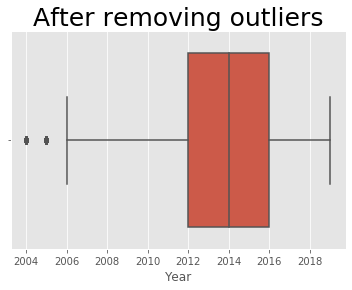

In [162]:
 sns.boxplot(x=df_train['Year'])
plt.title('After removing outliers',fontsize=25)

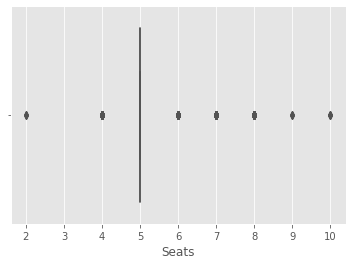

In [163]:
 sns.boxplot(x=df_train['Seats'])

In [164]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price_log
0,Maruti,Mumbai,2010.0,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.011601
1,Hyundai,Pune,2015.0,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,2.602690
2,Honda,Chennai,2011.0,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,1.704748
3,Maruti,Chennai,2012.0,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,1.945910
4,Audi,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,2.930660


## Checking for relationship among variables

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price_log
Year,1.000000,-0.450667,0.295911,-0.052041,0.040609,0.016459,0.486159
Kilometers_Driven,-0.450667,1.000000,-0.150563,0.205181,0.038042,0.204106,-0.167651
Mileage,0.295911,-0.150563,1.000000,-0.641404,-0.549194,-0.381095,-0.295028
Engine,-0.052041,0.205181,-0.641404,1.000000,0.831638,0.516211,0.674057
Power,0.040609,0.038042,-0.549194,0.831638,1.000000,0.203067,0.788801
Seats,0.016459,0.204106,-0.381095,0.516211,0.203067,1.000000,0.211147
Price_log,0.486159,-0.167651,-0.295028,0.674057,0.788801,0.211147,1.000000


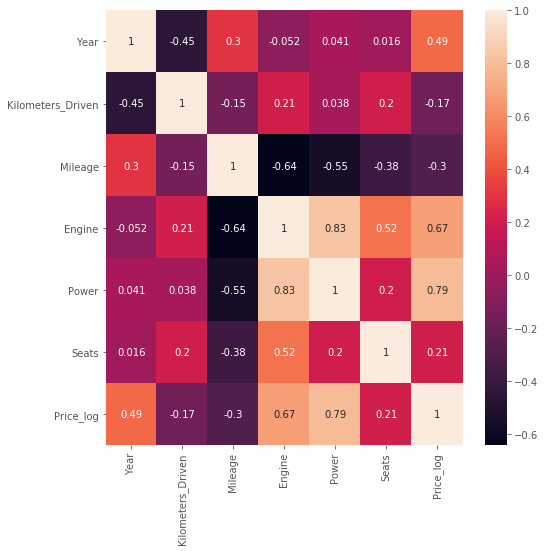

In [165]:
plt.figure(figsize=(8,8))
c= df_train.corr()
sns.heatmap(c,xticklabels=c.columns,yticklabels=c.columns
            ,annot=True)
c

### From the above heat map it can be concluded that price of the car is mainly depending on Power, Engine and year

## Visualizing the data

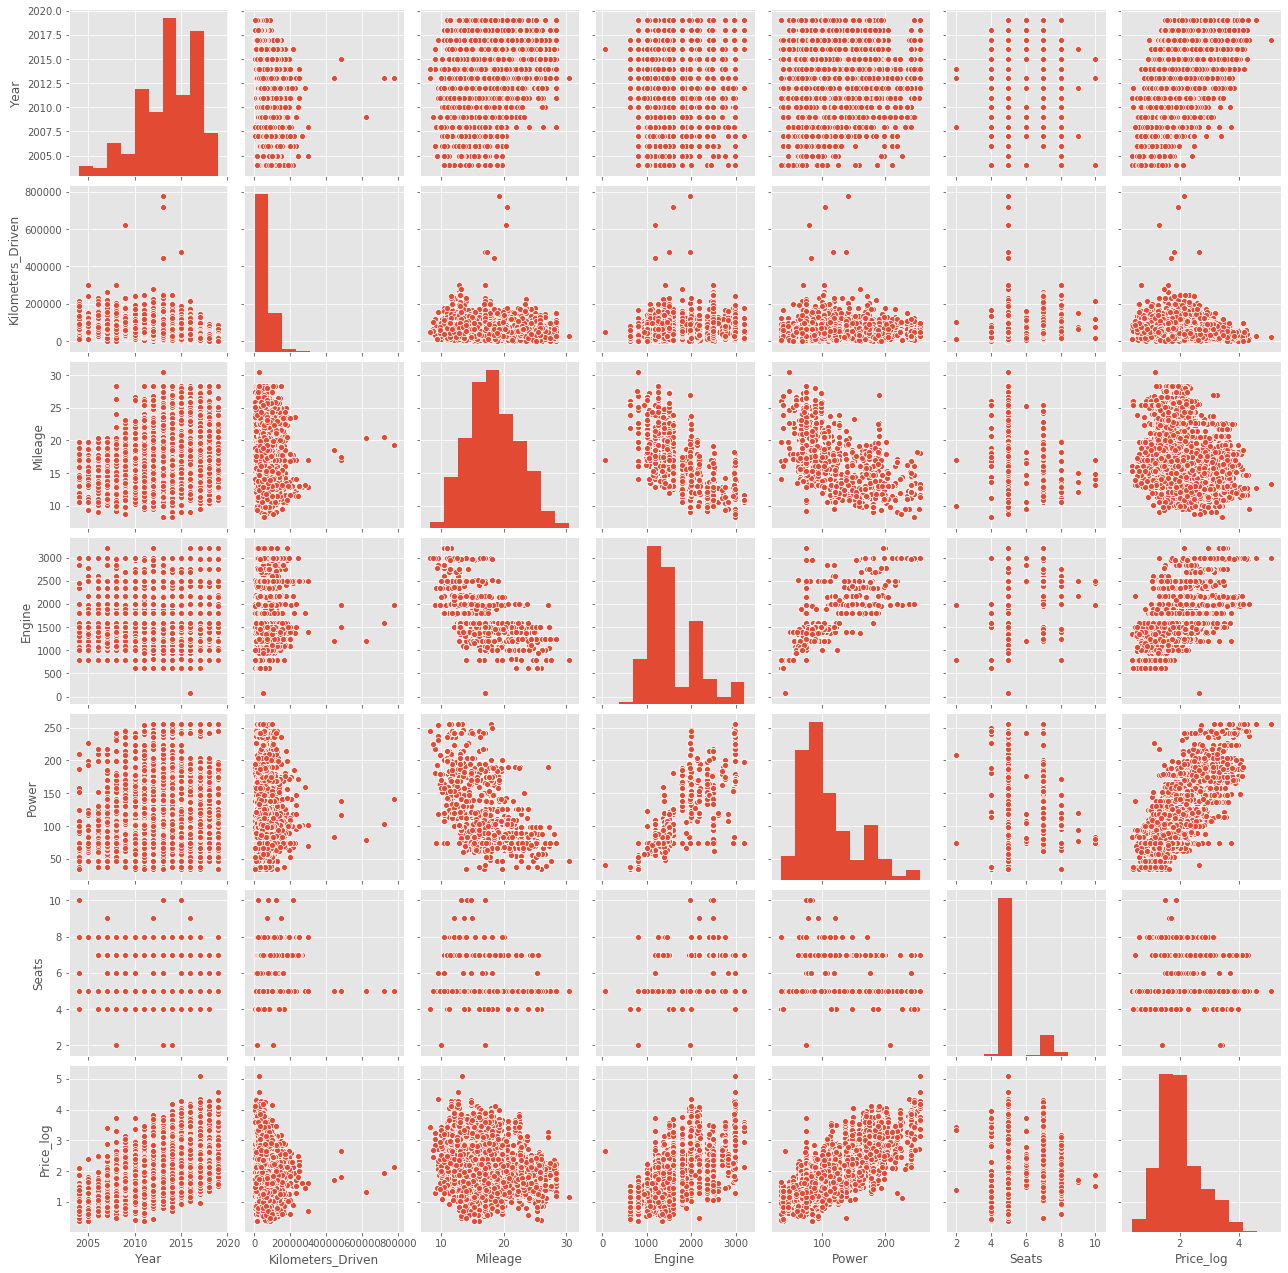

In [166]:
sns.pairplot(df_train)

## Checking For relations among the price and other variables

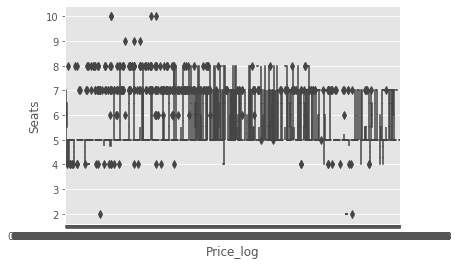

In [167]:
sns.boxplot(x='Price_log',y='Seats',data=df_train)

Text(0.5, 1.0, 'Relation Between Price and Company')

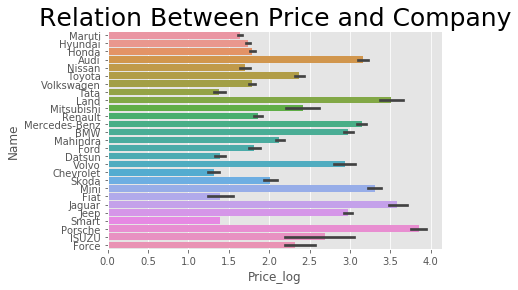

In [168]:
sns.barplot( x="Price_log", y="Name", data=df_train)
plt.title('Relation Between Price and Company',fontsize=25)

### Here we can see that cars like Porsche ,Jaguar and Land are very costly as compared to others

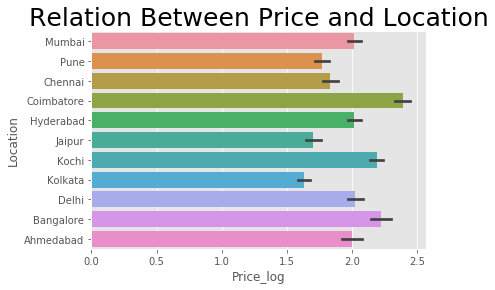

In [169]:
plt.title('Relation Between Price and Location',fontsize=25)
sns.barplot( x="Price_log", y="Location", data=df_train)

### Price of cars belonging to Coimbtaore is highest as compared to others


### Simalry we can see relation of price of car with city

Text(0.5, 1, 'Relation Between Price and Year')

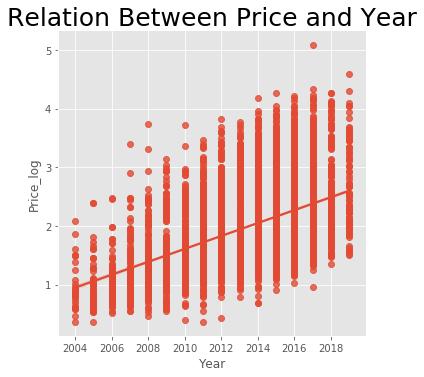

In [170]:

sns.lmplot('Year','Price_log',data=df_train)
plt.title('Relation Between Price and Year',fontsize=25)

### From above plot it's clear that price of cars are increasing with the year

Text(0.5, 1.0, 'Relation Between Price and Kilometers Driven')

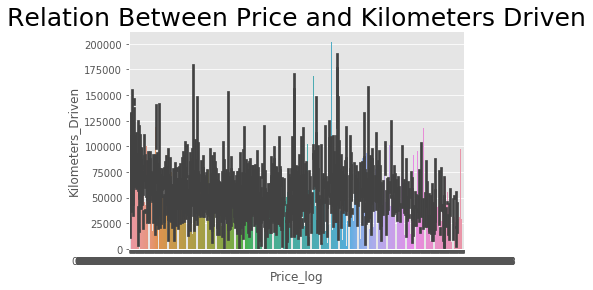

In [171]:
sns.barplot( x="Price_log", y="Kilometers_Driven", data=df_train)
plt.title('Relation Between Price and Kilometers Driven',fontsize=25)

Text(0.5, 1, 'Relation Between Price and Kilometres Driven')

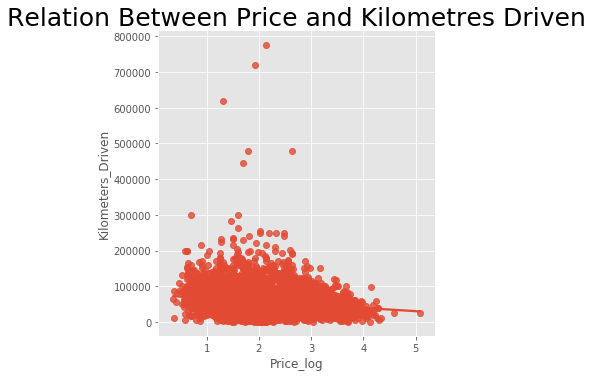

In [172]:
sns.lmplot('Price_log','Kilometers_Driven',data=df_train)
plt.title('Relation Between Price and Kilometres Driven',fontsize=25)

### much relation between car price and kilometres driven can't be seen

Text(0.5, 1.0, 'Relation Between Price and Fuel Type')

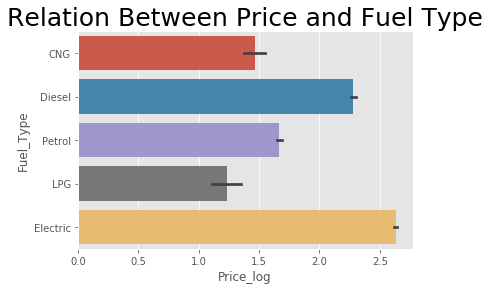

In [173]:
sns.barplot( x="Price_log", y="Fuel_Type", data=df_train)
plt.title('Relation Between Price and Fuel Type',fontsize=25)

### Electric cars are most costly followed by diesel , petrol, cng and lpg repectively

Text(0.5, 1.0, 'Relation Between Price and Mode of Transmission')

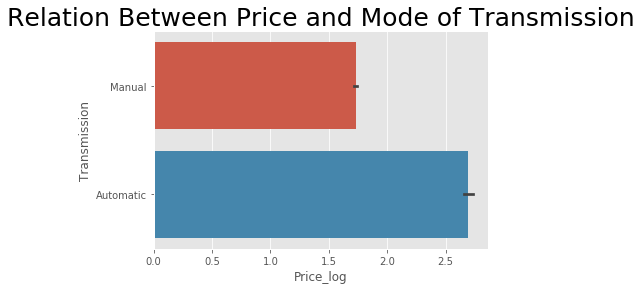

In [174]:
sns.barplot( x="Price_log", y="Transmission", data=df_train)
plt.title('Relation Between Price and Mode of Transmission',fontsize=25)

### Automatic cars are costlier than the manual cars
 

Text(0.5, 1.0, 'Relation Between Price and OwnerType')

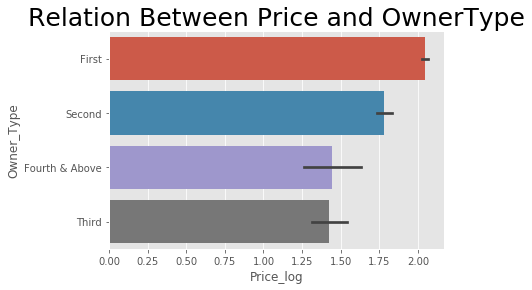

In [175]:
sns.barplot( x="Price_log", y="Owner_Type", data=df_train)
plt.title('Relation Between Price and OwnerType',fontsize=25)

### First hand are most costly and then second hand and then others

Text(0.5, 1, 'Relation Between Price and Mileage')

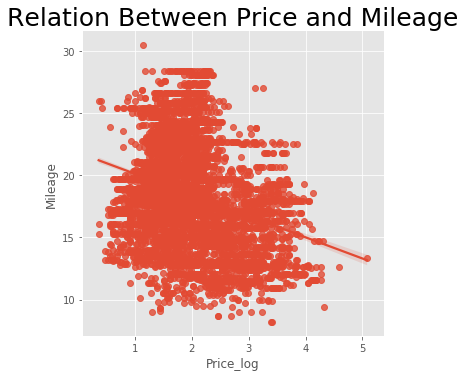

In [176]:
sns.lmplot('Price_log','Mileage',data=df_train)
plt.title('Relation Between Price and Mileage',fontsize=25)

### Very accurate relation can't be seen between the cost and mileage

Text(0.5, 1, 'Relation Between Price and YEngine')

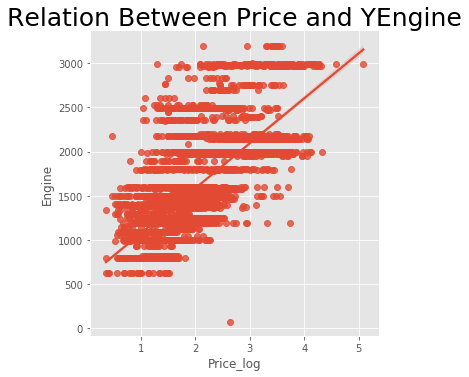

In [177]:
sns.lmplot('Price_log','Engine',data=df_train)
plt.title('Relation Between Price and YEngine',fontsize=25)

###  Price of car is increasing with increase in Engine capacity

Text(0.5, 1, 'Relation Between Price and Power')

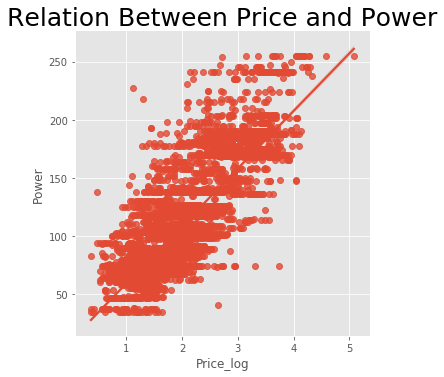

In [178]:
sns.lmplot('Price_log','Power',data=df_train)
plt.title('Relation Between Price and Power',fontsize=25)

### Price of car is increasing with increase in engine power

Text(0.5, 1, 'Relation Between Price and Seats')

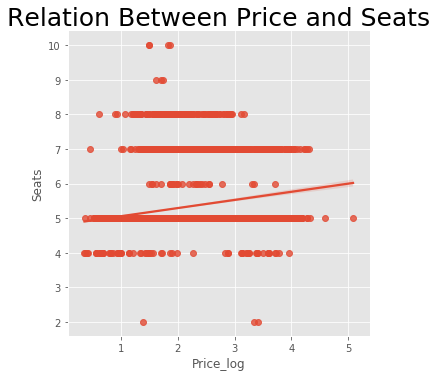

In [179]:
sns.lmplot('Price_log','Seats',data=df_train)
plt.title('Relation Between Price and Seats',fontsize=25)